In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
df_all = pd.read_csv('/opt/ml/code/df/valid/df_valid_20.csv')
del df_all['race']
del df_all['id']

In [3]:
## 남자 여자 따로 나눔

df_male = df_all[df_all['gender'] == 'male']
df_female = df_all[df_all['gender'] == 'female']

In [4]:
class Checker:
    
    mask_label = ['normal', 'incorrect', 'mask1', 'mask2', 'mask3', 'mask4', 'mask5']
    train_data_path = '/opt/ml/input/data/train'
    
    def __init__(self, df, facecolor='lightblue'):
        self.df = df
        self.iterator = df.iterrows()
        self.cnt = 0
        self.facecolor=facecolor
    
    def goto(self, cnt):
        self.cnt = 0
        self.iterator = self.df.iterrows()
        for _ in range(cnt-1):
            next(self.iterator)
            self.cnt += 1

    def next_page(self):
        
        self.cnt += 2
        fig, axes = plt.subplots(2, 7, figsize=(16, 7), facecolor=self.facecolor)
        fig.suptitle(f'{self.cnt}/{len(self.df)}')

        for ax in axes.flatten():
            ax.set_xticks([])
            ax.set_yticks([])

        for i in range(2):
            gender, age, path_ = next(self.iterator)[1]
            print(path_)
            path = os.path.join(self.train_data_path, 'images', path_)
            files = os.listdir(path)
            for j, mask in enumerate(self.mask_label):
                ax = axes[i][j]
                if j == 3:
                    ax.set_xlabel(path_)
                for f in files:
                    if f.startswith(mask):
                        img = Image.open(os.path.join(path,f))
                        ax.set_title(mask)
                        ax.imshow(img)

        plt.show()
        
    def query(self, path):

        fig, axes = plt.subplots(1, 7, figsize=(16, 3), facecolor=self.facecolor)
        fig.suptitle(path)

        for ax in axes.flatten():
            ax.axis('off')

        path = os.path.join(self.train_data_path, 'images', path)
        files = os.listdir(path)
        for j, mask in enumerate(self.mask_label):
            ax = axes[j]
            for f in files:
                if f.startswith(mask):
                    img = Image.open(os.path.join(path,f))
                    ax.set_title(mask)
                    ax.imshow(img)

        plt.show()

In [6]:
## 원하는 dataframe을 넣어주시면 됩니다. 눈의 보호를 위해 바탕색을 설정할수있습니다.

checker = Checker(df_female, facecolor='lightblue')

In [187]:
# 이걸 계속 실행시키면 1번째 이미지에서부터 마지막 이미지까지 2개씩 볼수 있습니다.

checker.next_page()

000782_female_Asian_58


StopIteration: 

006362_female_Asian_18 => 남자임

003325_female_Asian_19
000782_female_Asian_58


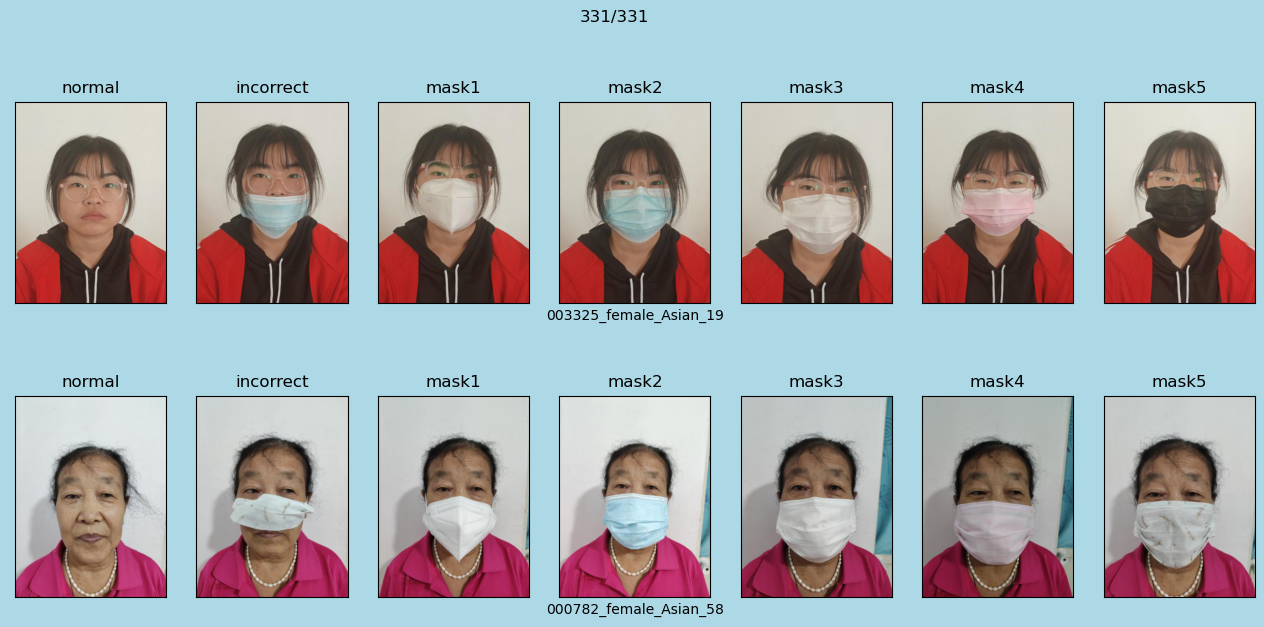

In [189]:
## checker.goto(n) 실행시키고 checker.next_page()하면 n번쨰와 n+1번째 이미지를 볼 수 있습니다. n은 1부터 시작합니다. 

checker.goto(330)
checker.next_page()

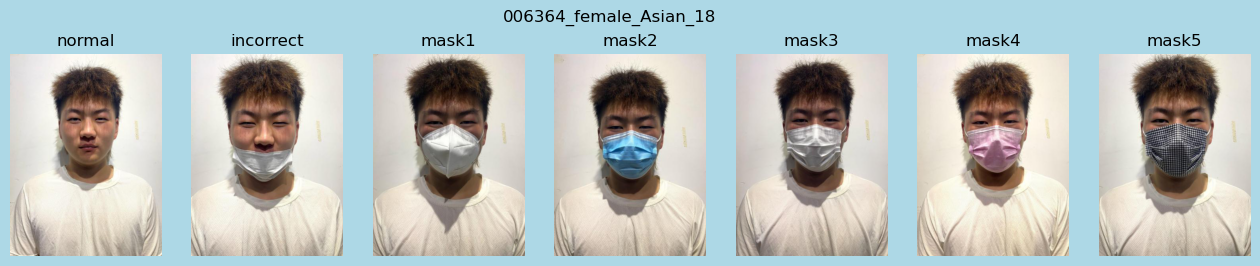

In [13]:
# 특정 인물을 다시보고 싶으면 checker.query(path)를 넣으면 됩니다!

checker.query('006364_female_Asian_18')

# df_female => male

'001720_female_Asian_18'
'006359_female_Asian_18'
'006360_female_Asian_18'
'006361_female_Asian_18'
'006362_female_Asian_18'
'006363_female_Asian_18'
'006364_female_Asian_18'

## # df_male Possible 오류

001498-1_male_Asian_23 => 여자같은디요?

003574_male_Asian_54 => 마스크 잘 낌

003823_male_Asian_48 => 잘 낀듯?

004413_male_Asian_18 => 확실히 잘낀거 아닌가?

004418_male_Asian_20 => normal, incorrect 바뀜

004432_male_Asian_43 => 여자같은디..

005223_male_Asian_22 => 남자 맞음?

005227_male_Asian_22 => normal, incorrect 바뀜